In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
from google.colab import files
uploaded = files.upload()

Saving defcon_level.csv to defcon_level (9).csv


In [3]:
import io
data = pd.read_csv(io.BytesIO(uploaded['defcon_level.csv']))

In [4]:
data.head()

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands),DEFCON_Level,ID
0,16,1,0.67,3,6.0,25.0,0.787812,324.36,1,862400.0,3,7570
1,8,1,0.11,2,38.0,48.0,0.419236,359.34,0,959200.0,4,12128
2,9,1,0.49,3,32.0,69.0,0.582232,332.84,1,836000.0,3,2181
3,7,0,0.30,2,31.0,52.0,0.589574,358.28,1,924000.0,3,5946
4,8,1,0.12,5,13.0,42.0,0.552863,364.64,0,968000.0,2,9054


In [5]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Allied_Nations,10000.0,8.317800,1.748802,5.00,7.000000,8.000000,9.000000,16.00
Diplomatic_Meetings_Set,10000.0,0.524100,0.500244,0.00,0.000000,1.000000,1.000000,2.00
Percent_Of_Forces_Mobilized,10000.0,0.270548,0.196434,0.00,0.090000,0.260000,0.430000,1.00
Hostile_Nations,10000.0,2.502300,1.311780,1.00,2.000000,2.000000,3.000000,16.00
Active_Threats,10000.0,15.754300,10.388906,1.00,7.000000,13.000000,21.000000,72.00
Inactive_Threats,10000.0,46.534600,34.012649,6.00,21.000000,37.000000,62.000000,289.00
Citizen_Fear_Index,10000.0,0.486639,0.134552,0.00,0.406021,0.486784,0.567548,1.00
Closest_Threat_Distance(km),10000.0,350.885758,16.285744,290.44,340.260000,350.860000,360.400000,425.06
Aircraft_Carriers_Responding,10000.0,0.891300,0.329082,0.00,1.000000,1.000000,1.000000,2.00
Troops_Mobilized(thousands),10000.0,917487.413333,92717.640162,739200.00,836000.000000,897600.000000,976800.000000,1311200.00


In [6]:
print(data.shape)

(10000, 12)


In [7]:
data.isna().sum()

Allied_Nations                  0
Diplomatic_Meetings_Set         0
Percent_Of_Forces_Mobilized     0
Hostile_Nations                 0
Active_Threats                  0
Inactive_Threats                0
Citizen_Fear_Index              0
Closest_Threat_Distance(km)     0
Aircraft_Carriers_Responding    0
Troops_Mobilized(thousands)     0
DEFCON_Level                    0
ID                              0
dtype: int64

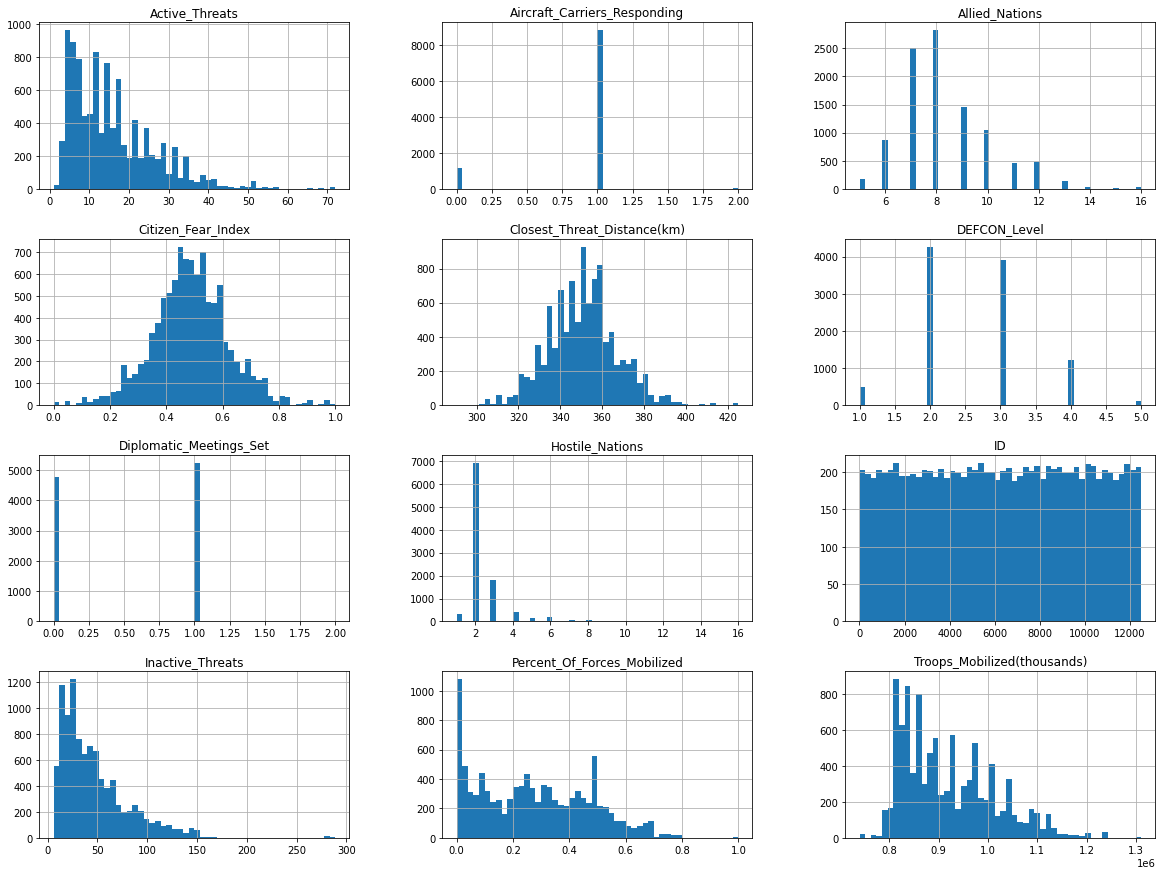

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize = (20,15))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4eb1f37940>,
      dtype=object)

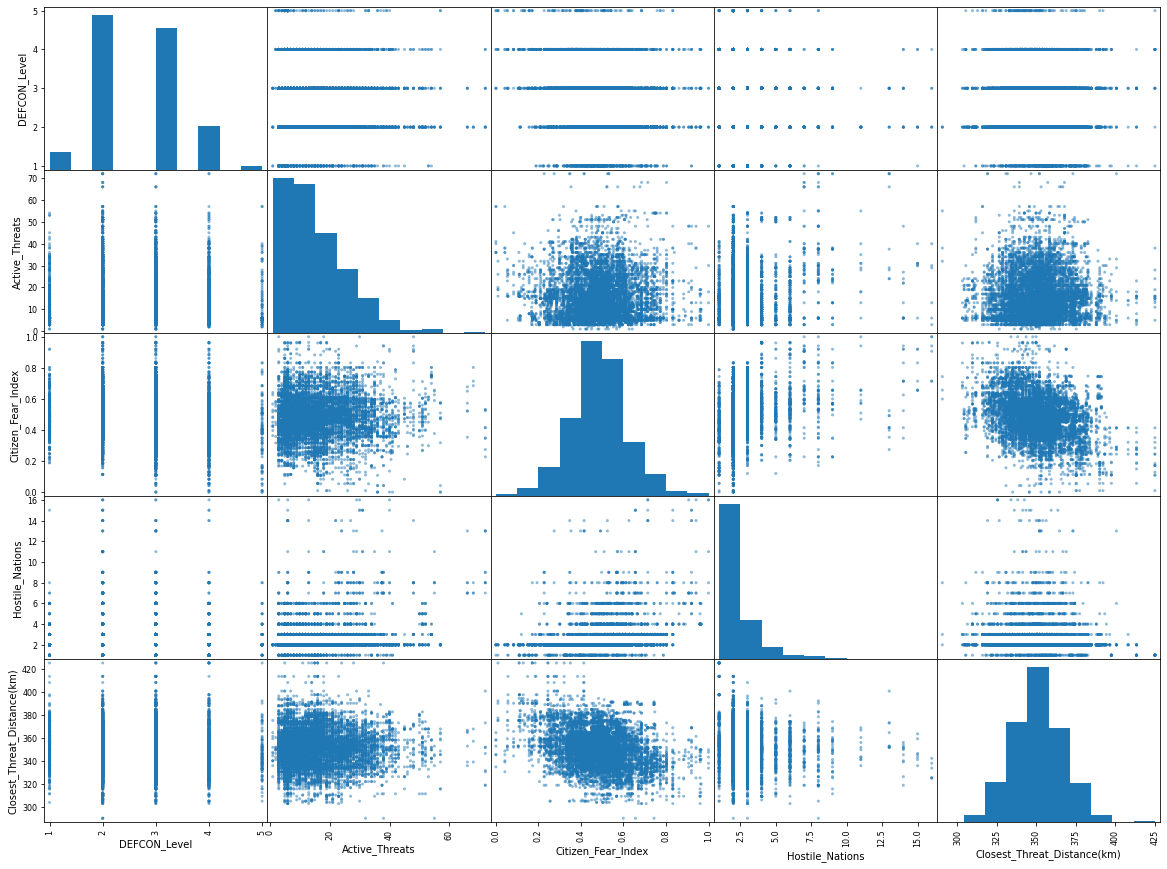

In [9]:
attributes = ["DEFCON_Level", "Active_Threats", "Citizen_Fear_Index", "Hostile_Nations", "Closest_Threat_Distance(km)" ]
pd.plotting.scatter_matrix(data[attributes], figsize=(20, 15))

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


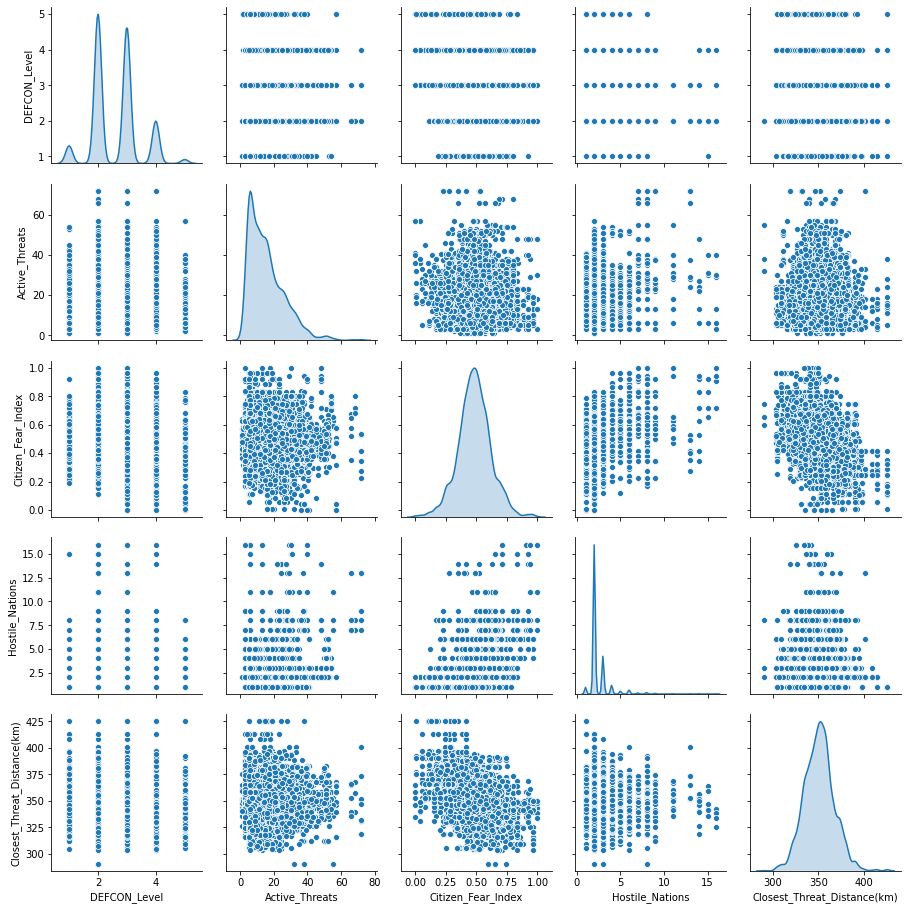

In [10]:
import seaborn as sns
sns.pairplot(data[attributes], diag_kind="kde")

Split the Data into Train and Test


In [11]:
from sklearn.preprocessing import StandardScaler as ss
scale = ss()


In [12]:

train_data = data.sample(frac=0.8, random_state= 0)

In [13]:
test_data = data.drop(train_data.index)

In [14]:
train_data['Closest_Threat_log'] = np.log(train_data['Closest_Threat_Distance(km)'])
train_data['Troops_Mobilized_log'] = np.log(train_data['Troops_Mobilized(thousands)'])
train_data = train_data.drop(['ID'], axis=1)


test_data['Closest_Threat_log'] = np.log(test_data['Closest_Threat_Distance(km)'])
test_data['Troops_Mobilized_log'] = np.log(test_data['Troops_Mobilized(thousands)'])

In [15]:
scale.fit(train_data)
scale.fit(test_data)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [16]:
train_stats = train_data.describe()
train_stats.pop("DEFCON_Level")
train_stats= train_stats.transpose()

In [17]:
test_stats = test_data.describe()
test_stats.pop("DEFCON_Level")
test_stats= test_stats.transpose()

In [18]:
train_stats

,count,mean,std,min,25%,50%,75%,max
Allied_Nations,8000.0,8.325500,1.750124,5.000000,7.000000,8.000000,9.000000,1.600000e+01
Diplomatic_Meetings_Set,8000.0,0.519625,0.500646,0.000000,0.000000,1.000000,1.000000,2.000000e+00
Percent_Of_Forces_Mobilized,8000.0,0.272294,0.196435,0.000000,0.090000,0.260000,0.430000,1.000000e+00
Hostile_Nations,8000.0,2.503625,1.320683,1.000000,2.000000,2.000000,3.000000,1.600000e+01
Active_Threats,8000.0,15.823500,10.431033,1.000000,7.000000,13.000000,21.000000,7.200000e+01
Inactive_Threats,8000.0,46.737437,34.271553,6.000000,21.000000,37.000000,63.000000,2.890000e+02
Citizen_Fear_Index,8000.0,0.487190,0.134526,0.000000,0.406021,0.486784,0.567548,1.000000e+00
Closest_Threat_Distance(km),8000.0,350.752675,16.305571,290.440000,340.260000,350.860000,360.400000,4.250600e+02
Aircraft_Carriers_Responding,8000.0,0.892000,0.328404,0.000000,1.000000,1.000000,1.000000,2.000000e+00
Troops_Mobilized(thousands),8000.0,917189.350000,92447.709749,739200.000000,836000.000000,897600.000000,976800.000000,1.311200e+06


In [19]:
train_labels = train_data.pop("DEFCON_Level")


In [20]:
test_labels = test_data.pop("DEFCON_Level")

In [21]:
train_data

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands),Closest_Threat_log,Troops_Mobilized_log
9394,7,0,0.60,2,35.0,125.0,0.386931,354.04,1,985600.0,5.869410,13.801006
898,8,1,0.26,2,13.0,105.0,0.444200,339.20,0,836000.0,5.826590,13.636384
2398,9,0,0.35,2,10.0,39.0,0.508811,364.64,1,924000.0,5.898911,13.736467
5906,9,1,0.02,2,5.0,14.0,0.510279,348.74,1,871200.0,5.854327,13.677627
2343,10,1,0.24,2,12.0,42.0,0.479442,329.66,1,880000.0,5.798062,13.687677
...,...,...,...,...,...,...,...,...,...,...,...,...
8673,9,1,0.24,2,9.0,48.0,0.457416,330.72,0,853600.0,5.801272,13.657218
8175,10,0,0.40,2,41.0,74.0,0.325991,326.48,1,1038400.0,5.788369,13.853192
4933,9,0,0.47,2,7.0,19.0,0.450073,339.20,1,1003200.0,5.826590,13.818705
504,10,0,0.49,3,4.0,23.0,0.626285,334.96,1,985600.0,5.814011,13.801006


In [22]:
norm_train_data = (train_data - train_stats['mean'] ) / train_stats['std']
norm_test_data = (test_data - test_stats['mean']) / test_stats['std']
#norm_train_data = (train_data)
#norm_test_data = (test_data)
test_data.head()
 

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands),ID,Closest_Threat_log,Troops_Mobilized_log
0,16,1,0.67,3,6.0,25.0,0.787812,324.36,1,862400.0,7570,5.781854,13.667474
13,6,0,0.00,2,27.0,60.0,0.428047,365.70,1,968000.0,2451,5.901813,13.782987
21,8,1,0.01,2,5.0,11.0,0.367841,358.28,1,1012000.0,3918,5.881315,13.827439
25,8,1,0.13,2,11.0,31.0,0.464758,345.56,1,959200.0,10987,5.845166,13.773855
26,10,0,0.35,2,10.0,28.0,0.529369,341.32,1,906400.0,8830,5.832820,13.717236


Normalize data

In [23]:
norm_train_data.head()

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands),Closest_Threat_log,Troops_Mobilized_log
9394,-0.757375,-1.037909,1.668270,-0.381337,1.838409,2.283601,-0.745277,0.201607,0.328863,0.739993,0.224356,0.786046
898,-0.185987,0.959511,-0.062584,-0.381337,-0.270683,1.700027,-0.319571,-0.708511,-2.716163,-0.878219,-0.698942,-0.898730
2398,0.385401,-1.037909,0.395583,-0.381337,-0.558286,-0.225769,0.160713,0.851692,0.328863,0.073670,0.860458,0.125545
5906,0.385401,0.959511,-1.284364,-0.381337,-1.037625,-0.955236,0.171628,-0.123435,0.328863,-0.497463,-0.100874,-0.476641
2343,0.956790,0.959511,-0.164399,-0.381337,-0.366550,-0.138232,-0.057598,-1.293587,0.328863,-0.402274,-1.314073,-0.373784


It can be seen that we didnt carry out one-hot coding as lable values are already numeric and descreat. 
It also need to be noted that normalization of data has to be done everytime new data is fed to the model, and hence for test data as well while prediction.

**Model** **building**

In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Sequential
from tensorflow.keras import Sequential

In [25]:
def model_build():
  model = keras.Sequential()
  model.add(layers.Dense(64, activation = 'relu', input_shape = [len(train_data.keys())]))
  model.add(layers.Dense(64, activation = 'relu'))
  model.add(layers.Dense(6, activation = 'softmax'))

  # defining optimizer ADAM with learning rate as 0.0001

  Optimizer = tf.keras.optimizers.Adam(0.0001) 

  # Compile the model

  model.compile(loss='categorical_crossentropy', optimizer = Optimizer, metrics=['accuracy'])
  return model


In [26]:
model = model_build()

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                832       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 390       
Total params: 5,382
Trainable params: 5,382
Non-trainable params: 0
_________________________________________________________________


In [28]:
example_batch = norm_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[0.14759317, 0.28507113, 0.1742055 , 0.18060268, 0.13991554,
        0.07261194],
       [0.19263221, 0.15069585, 0.19495453, 0.1725136 , 0.18044601,
        0.10875776],
       [0.16814803, 0.18640372, 0.17997366, 0.1785333 , 0.15982528,
        0.12711605],
       [0.16870745, 0.21717903, 0.16718529, 0.1610427 , 0.17322285,
        0.11266262],
       [0.147686  , 0.19044486, 0.16457278, 0.21721724, 0.17326988,
        0.10680924],
       [0.14324756, 0.19722986, 0.1874759 , 0.24018459, 0.15253952,
        0.07932258],
       [0.20293002, 0.24473074, 0.13403454, 0.14326626, 0.17216165,
        0.1028768 ],
       [0.18586907, 0.15888308, 0.16949634, 0.1607248 , 0.1575197 ,
        0.16750696],
       [0.16434821, 0.15437205, 0.14475428, 0.27723676, 0.15183415,
        0.10745455],
       [0.18914272, 0.15296276, 0.1556636 , 0.19576228, 0.16828746,
        0.13818121]], dtype=float32)

we are yet to train the model, and hence above results are showm like this. 

In [29]:
norm_test_data[:10]

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands),ID,Closest_Threat_log,Troops_Mobilized_log
0,4.423599,0.919019,2.070237,0.394246,-0.927661,-0.628881,2.252854,-1.670323,0.335998,-0.599974,0.354820,-1.716614,-0.586521
13,-1.311652,-1.087573,-1.342507,-0.389543,1.127827,0.433251,-0.418717,0.881636,0.335998,0.525784,-1.082140,0.887959,0.577455
21,-0.164602,0.919019,-1.291571,-0.389543,-1.025542,-1.053734,-0.865796,0.423592,0.335998,0.994850,-0.670337,0.442893,1.025377
25,-0.164602,0.919019,-0.680333,-0.389543,-0.438259,-0.446801,-0.146108,-0.361626,0.335998,0.431971,1.314010,-0.341969,0.485430
26,0.982448,-1.087573,0.440269,-0.389543,-0.536140,-0.537841,0.333685,-0.623365,0.335998,-0.130908,0.708516,-0.610023,-0.085095
28,-0.164602,-1.087573,-0.578460,2.745611,0.051142,1.889890,0.617198,-0.296191,-2.677434,-0.975227,-0.592299,-0.275469,-1.006440
35,-0.738127,0.919019,-0.731269,1.178034,3.574836,0.767064,-0.636804,-0.230756,-2.677434,0.244344,0.141199,-0.209172,0.298822
41,-1.311652,0.919019,-0.323778,4.313187,3.868477,2.284396,-0.800370,-0.427061,0.335998,0.713410,-1.149791,-0.408673,0.759020
43,-1.311652,0.919019,-0.884079,-0.389543,-0.829781,-0.537841,-1.345588,1.339680,0.335998,0.901037,-0.522402,1.324086,0.937371
52,0.408923,0.919019,0.083714,-0.389543,-1.123422,-0.537841,-0.200630,-0.230756,0.335998,1.276289,-1.438924,-0.209172,1.284874


**Training the model**

In [30]:
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-3ahlhsht
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-3ahlhsht
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.002b81634107b8b3088097c791f2e827893ae2137_-cp36-none-any.whl size=146366 sha256=4e919c7f1ea6c8fea2d045effb9d438a0be6e3bb86c4dce999fe2224d7e8d51e
  Stored in directory: /tmp/pip-ephem-wheel-cache-tsn_aas8/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs


In [31]:
EPOCHOS = 1000

In [32]:
norm_train_data.shape

(8000, 12)

In [33]:
train_labels.shape

(8000,)

In [34]:
from tensorflow.keras.utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)


In [35]:
x_val = norm_train_data[:1600]
partial_x_data = norm_train_data[1600:]

In [36]:
y_val = one_hot_train_labels[:1600]
partial_y_data = one_hot_train_labels[1600:]

In [37]:
y_val.shape

(1600, 6)

In [38]:
partial_x_data.shape

(6400, 12)

In [39]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

In [40]:
history = model.fit(partial_x_data, partial_y_data, epochs= 1000, batch_size = 500, validation_data=(x_val, y_val), 
                    verbose=0, callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, accuracy:0.2761,  loss:1.6916,  val_accuracy:0.3194,  val_loss:1.6636,  
....................................................................................................
Epoch: 100, accuracy:0.5639,  loss:0.9958,  val_accuracy:0.5612,  val_loss:0.9936,  
....................................................................................................
Epoch: 200, accuracy:0.5745,  loss:0.9570,  val_accuracy:0.5700,  val_loss:0.9752,  
....................................................................................................
Epoch: 300, accuracy:0.5842,  loss:0.9341,  val_accuracy:0.5775,  val_loss:0.9680,  
....................................................................................................
Epoch: 400, accuracy:0.5956,  loss:0.9164,  val_accuracy:0.5794,  val_loss:0.9656,  
....................................................................................................
Epoch: 500, accuracy:0.6005,  loss:0.9013,  val_accuracy:0.5794,  val_l

Plot training and validation loss

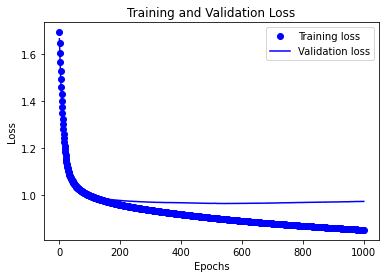

In [41]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(val_loss) + 1)
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs,val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


This graph shows little improvement, or even degradation in the validation error after about 200 epochs.

Let's update the model.fit call to automatically stop training when the validation score doesn't improve.

We'll use an EarlyStopping callback that tests a training condition for every epoch.

If a set amount of epochs elapses without showing improvement, then automatically stop the training.

In [42]:
model = model_build()

In [43]:
# The patience parameter is the amount of epochs to check for improvement
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [44]:
early_history = model.fit(partial_x_data, partial_y_data, epochs= 1000, batch_size = 500, validation_data=(x_val, y_val), 
                    verbose=0, callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, accuracy:0.0820,  loss:1.9929,  val_accuracy:0.0787,  val_loss:1.9569,  
....................................................................................................
Epoch: 100, accuracy:0.5648,  loss:1.0037,  val_accuracy:0.5612,  val_loss:0.9987,  
....................................................................................................
Epoch: 200, accuracy:0.5781,  loss:0.9635,  val_accuracy:0.5725,  val_loss:0.9751,  
....................................................................................................
Epoch: 300, accuracy:0.5923,  loss:0.9385,  val_accuracy:0.5781,  val_loss:0.9673,  
....................................................................................................
Epoch: 400, accuracy:0.5972,  loss:0.9199,  val_accuracy:0.5738,  val_loss:0.9635,  
...............................................................................

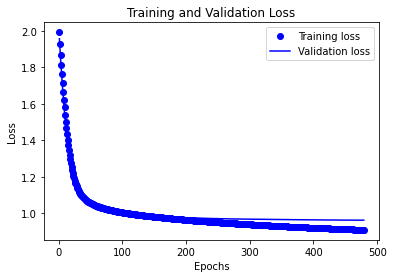

In [45]:
loss =early_history.history['loss']
val_loss = early_history.history['val_loss']
epochs = range(1, len(val_loss) + 1)
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs,val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

The training stopped before completing the 1000 epochs due to our EarlyStopping callback.

Make predictions

**Model Tuning**

Increase number of hidden layers and units of neurons

We can improve model performance by increasing the number of hidden layers and hidden units in the model.

But this can result in overfitting.
Here, we are increasing the number of hidden layers from 2 to 4 i. e. adding 2 additional layers.

Next, we are using 256 hidden units instead of 64.

In [47]:
def model_build():
  model = keras.Sequential()
  model.add(layers.Dense(256, activation = 'relu', input_shape = [len(train_data.keys())]))
  model.add(layers.Dense(256, activation = 'relu'))
  model.add(layers.Dense(256, activation = 'relu'))
  model.add(layers.Dense(256, activation = 'relu'))
  model.add(layers.Dense(6, activation = 'softmax'))

  # defining optimizer ADAM with learning rate as 0.0001

  Optimizer = tf.keras.optimizers.Adam(0.0001) 

  # Compile the model

  model.compile(loss='categorical_crossentropy', optimizer = Optimizer, metrics=['accuracy'])
  return model

We are not using the Early Stopping callback now.

The model will be trained for 250 epochs.

In [48]:
model = model_build()

In [49]:
history_large = model.fit(partial_x_data, partial_y_data, epochs= 250, validation_data=(x_val, y_val), 
                    verbose=0, callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, accuracy:0.5291,  loss:1.1825,  val_accuracy:0.5606,  val_loss:1.0266,  
....................................................................................................
Epoch: 100, accuracy:0.7989,  loss:0.4946,  val_accuracy:0.5437,  val_loss:1.2337,  
....................................................................................................
Epoch: 200, accuracy:0.9109,  loss:0.2360,  val_accuracy:0.5044,  val_loss:2.1083,  
..................................................

In [51]:
accuracy= model.evaluate(norm_test_data[norm_train_data.columns], one_hot_test_labels, verbose=2)

63/63 - 0s - loss: 2.5131 - accuracy: 0.5295


We get a significant increase in the test set error.

The larger model is overfitting the train set.

The performance on the test set is worse than our smaller model.

**Weight Regularization**

In [52]:
from tensorflow.keras import regularizers

def model_build():
  model = keras.Sequential()
  model.add(layers.Dense(256, activation = 'relu', kernel_regularizer=regularizers.l2(0.0001), input_shape = [len(train_data.keys())]))
  model.add(layers.Dense(256, activation = 'relu' , kernel_regularizer=regularizers.l2(0.0001)))
  model.add(layers.Dense(256, activation = 'relu',kernel_regularizer=regularizers.l2(0.0001)))
  model.add(layers.Dense(256, activation = 'relu',  kernel_regularizer=regularizers.l2(0.0001)))
  model.add(layers.Dense(6, activation = 'softmax'))

  # defining optimizer ADAM with learning rate as 0.0001

  Optimizer = tf.keras.optimizers.Adam(0.0001) 

  # Compile the model

  model.compile(loss='categorical_crossentropy', optimizer = Optimizer, metrics=['accuracy'])
  return model



In [53]:
model = model_build()

In [54]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 256)               3328      
_________________________________________________________________
dense_12 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_13 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_14 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_15 (Dense)             (None, 6)                 1542      
Total params: 202,246
Trainable params: 202,246
Non-trainable params: 0
_________________________________________________________________


In [55]:
history_l2 = model.fit(partial_x_data, partial_y_data, epochs= 300, validation_data=(x_val, y_val), verbose = 0, callbacks=[tfdocs.modeling.EpochDots()]) 
                    


Epoch: 0, accuracy:0.5195,  loss:1.2818,  val_accuracy:0.5700,  val_loss:1.1038,  
....................................................................................................
Epoch: 100, accuracy:0.7730,  loss:0.6261,  val_accuracy:0.5587,  val_loss:1.2467,  
....................................................................................................
Epoch: 200, accuracy:0.8944,  loss:0.3703,  val_accuracy:0.5325,  val_loss:1.9968,  
....................................................................................................

In [57]:
accuracy= model.evaluate(norm_test_data[norm_train_data.columns], one_hot_test_labels, verbose=1)

63/63 [==============================] - 0s 2ms/step - loss: 2.7235 - accuracy: 0.5255


Experiment with dropout

Let's add Dropout layers in network to see how well they do at reducing overfitting.

In [58]:
from tensorflow.keras import regularizers

def model_build():
    model = keras.Sequential([layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=[len(train_data.keys())]),
                          layers.Dropout(0.2),
                          layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
                          layers.Dropout(0.2),
                          layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
                          layers.Dropout(0.2),
                          layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
                          layers.Dropout(0.2),
                          layers.Dense(6, activation= 'softmax')])
                  
                      

  # defining optimizer ADAM with learning rate as 0.0001

    Optimizer = tf.keras.optimizers.Adam(0.0001) 

  # Compile the model

    model.compile(loss='categorical_crossentropy', optimizer = Optimizer, metrics=['accuracy'])
    return model

In [59]:
model = model_build()

In [60]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 256)               3328      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 256)              

In [61]:
history_l2_dropout = model.fit(partial_x_data, partial_y_data, epochs= 300, validation_data=(x_val, y_val), verbose = 0,  callbacks=[tfdocs.modeling.EpochDots()]) 


Epoch: 0, accuracy:0.4945,  loss:2.0131,  val_accuracy:0.5644,  val_loss:1.7850,  
....................................................................................................
Epoch: 100, accuracy:0.5964,  loss:0.9704,  val_accuracy:0.5987,  val_loss:1.0182,  
....................................................................................................
Epoch: 200, accuracy:0.6302,  loss:0.9096,  val_accuracy:0.5919,  val_loss:1.0220,  
....................................................................................................

In [62]:
accuracy= model.evaluate(norm_test_data[norm_train_data.columns], one_hot_test_labels, verbose=1)

63/63 [==============================] - 0s 2ms/step - loss: 1.0591 - accuracy: 0.5740


**Batch normalization** 

Since we are using ReLU activation function in our model, we will use the Batch Normalization layer prior to the ReLU layer.

In [63]:
from tensorflow.keras import regularizers

def model_build():
  model = keras.Sequential([layers.Dense(256, input_shape=[len(train_data.keys())]),
                          layers.BatchNormalization(),
                          layers.ReLU(),
                          layers.Dense(256),
                          layers.BatchNormalization(),
                          layers.ReLU(),
                          layers.Dense(256),
                          layers.BatchNormalization(),
                          layers.ReLU(),
                          layers.Dense(256),
                          layers.BatchNormalization(),
                          layers.ReLU(),
                          layers.Dense(6),
                          layers.Softmax()])

  # defining optimizer ADAM with learning rate as 0.0001

  Optimizer = tf.keras.optimizers.Adam(0.0001) 

  # Compile the model

  model.compile(loss='categorical_crossentropy', optimizer = Optimizer, metrics=['accuracy'])
  return model

In [64]:
model = model_build()

In [65]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 256)               3328      
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
re_lu (ReLU)                 (None, 256)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 256)               65792     
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 256)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 256)              

In [66]:
history_batch_norm = model.fit(partial_x_data, partial_y_data, epochs= 300, validation_data=(x_val, y_val), verbose = 0, callbacks=[tfdocs.modeling.EpochDots()]) 


Epoch: 0, accuracy:0.4450,  loss:1.4688,  val_accuracy:0.5275,  val_loss:1.2458,  
....................................................................................................
Epoch: 100, accuracy:0.7420,  loss:0.5964,  val_accuracy:0.5406,  val_loss:1.2041,  
....................................................................................................
Epoch: 200, accuracy:0.8025,  loss:0.4772,  val_accuracy:0.5169,  val_loss:1.4147,  
....................................................................................................

In [67]:
accuracy= model.evaluate(norm_test_data[norm_train_data.columns], one_hot_test_labels, verbose=1)

63/63 [==============================] - 0s 2ms/step - loss: 1.4693 - accuracy: 0.5420


In [68]:
pred = np.argmax(model.predict(norm_test_data[train_data.columns]), axis = 1)

In [69]:
n = len(one_hot_test_labels)/100
print([(x, sum(np.argmax(one_hot_test_labels, axis= 1)==x), sum(np.argmax(one_hot_test_labels, axis= 1)==x)/n) for x in range(1, 6)])
n = len(pred)/100
print([(x, sum(pred==x), sum(pred==x)/n) for x in range(1, 6)])



[(1, 97, 4.85), (2, 851, 42.55), (3, 785, 39.25), (4, 247, 12.35), (5, 20, 1.0)]
[(1, 80, 4.0), (2, 929, 46.45), (3, 708, 35.4), (4, 262, 13.1), (5, 21, 1.05)]


In [72]:
predictions = pd.DataFrame()
predictions['ID'] = test_data['ID']
predictions['DEFCON_Level'] = pred
predictions.to_csv("submission.csv", index=False)

In [73]:
predictions

,ID,DEFCON_Level
0,7570,2
13,2451,3
21,3918,1
25,10987,1
26,8830,3
...,...,...
9963,1370,3
9969,2920,2
9972,7482,3
9982,7875,2
